In [1]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('train.csv')
df.columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_10732\1011637056.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [59]:
df.shape

(100000, 28)

### Dropping irrelevent columns

In [4]:
df1 = df.drop(columns = ['Name', 'SSN', 'Type_of_Loan', 'Month'], 
              axis = 1)

### Removing underscore from data points

In [5]:
cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for col in cols:
    df1[col] = df1[col].str.replace('_', '').str.strip()

### Converting data type to float

In [6]:
df1.replace('', np.nan, inplace=True)

for col in cols:
    df1[col] = df1[col].astype('float')

### Replacing null values

In [7]:
df2 = pd.DataFrame(df1.isna().sum(), columns = ['count'])
df2[df2['count'] > 0]

,count
Monthly_Inhand_Salary,15002
Num_of_Delayed_Payment,7002
Changed_Credit_Limit,2091
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,2868


In [8]:
new_df = df1.copy()

In [9]:
# Replacing null values with 0

new_df['Num_of_Delayed_Payment'] = new_df['Num_of_Delayed_Payment'].fillna(0)
new_df['Changed_Credit_Limit'] = new_df['Changed_Credit_Limit'].fillna(0)
new_df['Num_Credit_Inquiries'] = new_df['Changed_Credit_Limit'].fillna(0)

In [10]:
#Converting credit history age in text format to years

def get_year(value):
    if pd.notna(value) and value != '':
        value = value.split()
        year = int(value[0])
        month = int(value[3])
        total = round(year + month/12, 3)
        return total
    else:
        return None

new_df['Credit_History_Age'] = new_df['Credit_History_Age'].apply(lambda x: get_year(x))

In [11]:
# Replacing null values with mean

cols = ['Monthly_Inhand_Salary', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age']
for col in cols:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

### Converting negative values

In [12]:
cols = new_df.select_dtypes(include = ['int', 'float']).columns

for c in cols:
    if c == 'Age':
        new_df[c] = new_df[c].apply(lambda x: new_df[c].mean() if x < 0 else x)
    else:
        new_df[c] = new_df[c].apply(lambda x: 0 if x < 0 else x)

In [13]:
new_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,116.060056,1.764157e+05,4194.170850,17.091490,22.47443,72.466040,6.885960,21.081910,28.768750,10.209316,10.209316,1426.220376,32.285173,18.432959,1403.118217,637.412998,390.594211
std,683.811870,1.429618e+06,2935.176493,117.404803,129.05741,466.422621,59.150621,14.840204,218.116171,6.815193,6.815193,1155.129026,5.116875,7.927622,8306.041270,1997.034517,221.020342
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.083000,0.000000,0.000000,0.000000
25%,25.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,8.000000,4.970000,4.970000,566.072500,28.052567,12.833000,30.306660,77.017414,264.552132
50%,34.000000,3.757861e+04,3852.736667,6.000000,5.00000,13.000000,3.000000,18.000000,13.000000,9.250000,9.250000,1166.155000,32.305784,18.432959,69.249473,143.127915,331.928222
75%,42.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,14.660000,1945.962500,36.496663,24.333000,161.224249,304.765600,463.502161
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,36.970000,4998.070000,50.000000,33.667000,82331.000000,10000.000000,1602.040519


### Removing outliers using modified z-score

In [14]:
def get_modified_zscore(value, median, MAD):
    z = 0.6745 * (value - median) / MAD
    return z

In [15]:
cols = new_df.select_dtypes(include = ['int', 'float']).columns

for c in cols:
    new_col = 'zscore' + '_' + c

    median = np.median(new_df[c])
    diff = abs(new_df[c] - median)
    MAD = np.median(diff)
    
    new_df[new_col] = new_df[c].apply(lambda x: get_modified_zscore(x, median, MAD))
    df3 = new_df[(new_df[new_col] <= 3) & (new_df[new_col] >= -3)].copy()
    df3.drop(new_col, axis = 1, inplace = True)
    new_df = df3.copy()

### Converting float to int 

In [16]:
for col in new_df:
    if 'Num' in col and new_df[col].dtype == 'float':
        new_df[col] = new_df[col].astype(int)

In [17]:
new_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.00000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000,54690.000000
mean,33.139952,34351.134374,3059.008763,5.494240,5.618193,14.834248,3.37058,20.791699,12.664436,10.112534,9.627756,1332.583079,31.930486,18.330880,71.282714,135.649673,342.700710
std,10.777867,21637.018286,1729.903721,2.499972,1.943574,8.606827,2.34927,13.727964,6.746846,6.430869,6.408095,944.463442,4.975943,7.713345,62.551942,97.812560,122.955037
min,14.000000,7005.930000,303.645417,0.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.540000,21.264254,0.083000,0.000000,0.000000,0.000000
25%,24.000000,17470.167500,1571.442500,4.000000,4.000000,8.000000,2.00000,10.000000,8.000000,5.200000,5.000000,584.850000,27.742638,12.833000,25.209499,62.778040,268.066451
50%,33.000000,30028.290000,2838.603333,6.000000,5.000000,14.000000,3.00000,18.000000,13.000000,9.360000,9.000000,1191.750000,31.933025,18.432959,52.943493,107.970621,322.117873
75%,41.000000,44248.140000,4194.170850,7.000000,7.000000,20.000000,5.00000,28.000000,18.000000,14.440000,14.000000,1886.945000,36.136535,23.833000,100.091445,180.506001,408.965071
max,56.000000,131282.910000,10873.242500,10.000000,10.000000,34.000000,9.00000,59.000000,28.000000,30.390000,30.000000,4074.720000,43.884022,33.667000,267.859951,463.236628,676.501058


### Cleaning text data points

In [18]:
cols = ['Credit_Mix', 'Occupation']

for col in cols:
    new_df[col] = new_df[col].str.replace('_', '').str.strip()
    new_df[col] = new_df[col].apply(lambda x: np.nan if x == '' else x)

In [19]:
new_df['Credit_Mix'] = new_df['Credit_Mix'].fillna('Standard')
new_df['Occupation'] = new_df['Occupation'].fillna('Unemployed')

In [20]:
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].apply(lambda x: np.nan if x == '!@9#%8' else x)
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].ffill()

In [21]:
new_df.reset_index(drop = True, inplace = True)
new_df.head()

,ID,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,...,Standard,809.98,26.822620,22.083000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,23.0,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,31.944960,18.432959,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1605,CUS_0xd40,23.0,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,31.377862,22.333000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
3,0x1606,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22.417000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
4,0x1607,CUS_0xd40,23.0,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good


### Transforming text to number

In [22]:
final_df = new_df.copy()

In [23]:
m_Credit_Mix = {'Good' : 3, 'Standard' : 2, 'Bad' : 1}
final_df['Credit_Mix'] = final_df['Credit_Mix'].map(m_Credit_Mix)

In [24]:
m_Payment_Behaviour = {'Low_spent_Large_value_payments' : 1, 
                       'Low_spent_Medium_value_payments' : 2, 
                       'Low_spent_Small_value_payments' : 3,
                       'High_spent_Large_value_payments' : 4,
                       'High_spent_Medium_value_payments' : 5,
                       'High_spent_Small_value_payments' : 6                 
                      }

final_df['Payment_Behaviour'] = final_df['Payment_Behaviour'].map(m_Payment_Behaviour)

In [25]:
final_df['Payment_of_Min_Amount'] = final_df['Payment_of_Min_Amount'].apply(lambda x: 1 if x == 'Yes' else 0)

In [26]:
m_Credit_Score = {'Good' : 3, 'Standard' : 2, 'Poor' : 1}
final_df['Credit_Score'] = final_df['Credit_Score'].map(m_Credit_Score)

### Preprocessing

In [27]:
# Remove insignificant and highly correlated variables

X = final_df.drop(['ID', 'Customer_ID', 'Occupation', 'Credit_Score', 
                         'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Changed_Credit_Limit'], 
                        axis = 1)
y = final_df['Credit_Score']


# Check correlation between variables

corr_matrix = X.corr()

for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]): 
        if abs(corr_matrix.iloc[i, j]) >= 0.6:  
            print(corr_matrix.index[i], '-', corr_matrix.columns[j], '-', round(corr_matrix.iloc[i, j], 2))

Annual_Income - Monthly_Balance - 0.61
Interest_Rate - Credit_Mix - -0.64
Interest_Rate - Outstanding_Debt - 0.62


In [28]:
# Normalize independent variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Age,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.940821,-0.704217,-0.832594,-1.374996,0.267924,-1.296031,-0.839576,0.214144,-0.054108,-0.553338,-1.026522,0.486450,-1.121172,-0.347039,-0.564701,1.592927,-0.245674
1,-0.940821,-0.704217,-0.832594,-1.374996,0.267924,-1.514565,-1.877107,0.214144,1.570018,-0.553338,0.002909,0.013234,-1.121172,-0.347039,-0.177581,-1.613541,-0.472303
2,-0.940821,-0.704217,-0.832594,-1.374996,0.267924,-1.150341,-1.284232,-0.566126,1.570018,-0.553338,-0.111060,0.518861,-1.121172,-0.347039,0.652360,-0.330954,-0.969871
3,-0.940821,-0.704217,-0.832594,-1.374996,0.267924,-1.077497,-1.877107,0.214144,1.570018,-0.553338,-1.433538,0.529752,-1.121172,-0.347039,-0.963377,0.951633,-0.009853
4,-0.940821,-0.704217,-0.832594,-1.374996,0.267924,-0.931807,-1.284232,-0.097964,1.570018,-0.553338,-0.938168,0.540512,-1.121172,-0.347039,-0.748576,0.951633,-0.018068


In [29]:
# split into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10)

In [30]:
'''import statsmodels.api as sm

X = sm.add_constant(X_scaled)
Y = y
LR_lm = sm.MNLogit(Y, X).fit()
LR_lm.summary2(alpha = 0.05, float_format='%.2f')'''

"import statsmodels.api as sm\n\nX = sm.add_constant(X_scaled)\nY = y\nLR_lm = sm.MNLogit(Y, X).fit()\nLR_lm.summary2(alpha = 0.05, float_format='%.2f')"

### Checking accuracy of different models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50]
        }
    },
    'logistic_regression' : {
    'model': LogisticRegression(multi_class = 'multinomial'),
    'params': {
        'C': [1, 5, 10]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2, 3, 4, 5]
        }
    }
}

In [33]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.768514,{'n_estimators': 50}
1,logistic_regression,0.661782,{'C': 1}
2,decision_tree,0.715305,{'max_depth': 5}


### Applying best model

In [34]:
final_clf = RandomForestClassifier(n_estimators = 50)
final_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [35]:
final_clf.score(X_train, y_train)

0.9997910299610794

In [36]:
final_clf.score(X_test, y_test)

0.7810690558907784

### Classification Report and Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = final_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      5029
           2       0.80      0.81      0.81      8946
           3       0.71      0.63      0.67      2432

    accuracy                           0.78     16407
   macro avg       0.76      0.75      0.75     16407
weighted avg       0.78      0.78      0.78     16407



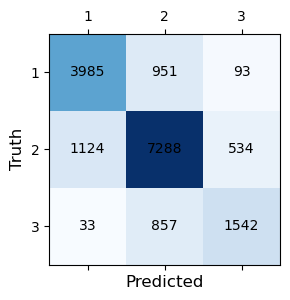

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 3))
ax.matshow(cm, cmap = 'Blues')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1', '2', '3'])

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['1', '2', '3'])

ax.set_xlabel('Predicted', fontsize = 12)
ax.set_ylabel('Truth', fontsize = 12)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, f'{cm[i, j]}',
                       ha='center', va='center', color = 'black')
        
plt.show()

In [62]:
import joblib
joblib.dump(final_clf, 'model')

['model']